In [1]:
import numpy as np
import pandas as pd
import warnings #to avoid warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('gplay.csv')  #to load dataset
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
dtype: int64

In [6]:
df.shape

(10841, 9)

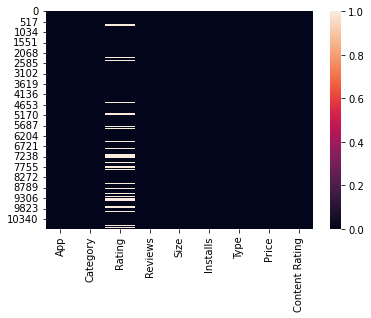

In [7]:
sns.heatmap(df.isnull())
plt.show()

In [8]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
dtype: object

In [9]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


In [10]:
df.isnull().sum()*100/df.shape[0]  #to find % of null values in each col

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
dtype: float64

In [11]:
#to fill null values of rating col  with mean of rating col permanently
m=df['Rating'].mean()
df['Rating'].fillna(m,inplace=True)

In [12]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
dtype: int64

In [13]:
df['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [14]:
df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

In [15]:
df['Type'].replace('0','Free',inplace=True)
df['Type'].fillna('Free',inplace=True)

In [16]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
dtype: int64

In [17]:
df['Type'].value_counts()

Free    10041
Paid      800
Name: Type, dtype: int64

In [18]:
df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [19]:
#fill null values of Content Rating column with 'Everyone'
df['Content Rating'].fillna('Everyone',inplace=True)
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
dtype: int64

In [20]:
df['Price'].replace('Everyone','0',inplace=True)

In [21]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [22]:
df["Price"]=df["Price"].map(lambda x:x.lstrip('$'))

In [23]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [24]:
df['Price'].dtype

dtype('O')

In [25]:
df['Price']=df['Price'].astype('float')  #change datatype of Price to float
df['Price'].dtype

dtype('float64')

In [26]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price             float64
Content Rating     object
dtype: object

In [27]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [28]:
df['Size']=df['Size'].map(lambda x:x.rstrip('M'))

In [29]:
df['Size'].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '2.7', '5.5', '17', '39', '31', '4.2',
       '7.0', '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24',
       'Varies with device', '9.4', '15', '10', '1.2', '26', '8.0', '7.9',
       '56', '57', '35', '54', '201k', '3.6', '5.7', '8.6', '2.4', '27',
       '2.5', '16', '3.4', '8.9', '3.9', '2.9', '38', '32', '5.4', '18',
       '1.1', '2.2', '4.5', '9.8', '52', '9.0', '6.7', '30', '2.6', '7.1',
       '3.7', '22', '7.4', '6.4', '3.2', '8.2', '9.9', '4.9', '9.5',
       '5.0', '5.9', '13', '73', '6.8', '3.5', '4.0', '2.3', '7.2', '2.1',
       '42', '7.3', '9.1', '55', '23k', '6.5', '1.5', '7.5', '51', '41',
       '48', '8.5', '46', '8.3', '4.3', '4.7', '3.3', '40', '7.8', '8.8',
       '6.6', '5.1', '61', '66', '79k', '8.4', '118k', '44', '695k',
       '1.6', '6.2', '18k', '53', '1.4', '3.0', '5.8', '3.8', '9.6', '45',
       '63', '49', '77', '4.4', '4.8', '70', '6.9', '9.3', '1

In [30]:
#First remove k in size column after that change the unit of size column from
#k to M divided by 1024.
#convert kb to MB

df["Size"]=df["Size"].map(lambda X :str(round((float(X.rstrip('k'))/1024),1)) 
                          if X[-1]=='k' else X)

#lambda input: expression if condition else expression2

In [31]:
df['Size'].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '2.7', '5.5', '17', '39', '31', '4.2',
       '7.0', '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24',
       'Varies with device', '9.4', '15', '10', '1.2', '26', '8.0', '7.9',
       '56', '57', '35', '54', '0.2', '3.6', '5.7', '8.6', '2.4', '27',
       '2.5', '16', '3.4', '8.9', '3.9', '2.9', '38', '32', '5.4', '18',
       '1.1', '2.2', '4.5', '9.8', '52', '9.0', '6.7', '30', '2.6', '7.1',
       '3.7', '22', '7.4', '6.4', '3.2', '8.2', '9.9', '4.9', '9.5',
       '5.0', '5.9', '13', '73', '6.8', '3.5', '4.0', '2.3', '7.2', '2.1',
       '42', '7.3', '9.1', '55', '0.0', '6.5', '1.5', '7.5', '51', '41',
       '48', '8.5', '46', '8.3', '4.3', '4.7', '3.3', '40', '7.8', '8.8',
       '6.6', '5.1', '61', '66', '0.1', '8.4', '44', '0.7', '1.6', '6.2',
       '53', '1.4', '3.0', '5.8', '3.8', '9.6', '45', '63', '49', '77',
       '4.4', '4.8', '70', '6.9', '9.3', '10.0', '8.1', '36'

In [32]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating'],
      dtype='object')

In [33]:
df['Reviews'].dtypes

dtype('O')

In [34]:
df['Reviews'].sample(20)

6898        547
447      205739
790      172505
8969          1
9959          9
7532          2
5207          8
4789         88
5070          6
8724       2576
192      217730
2193      38021
8465        796
1564        601
1380     144050
5638       7728
4630     233588
4183      99290
9575      93608
10072      5474
Name: Reviews, dtype: object

In [35]:
for col in df['Reviews']:
    if not col.isnumeric():
        print(col)

3.0M


In [36]:
df['Size'].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '2.7', '5.5', '17', '39', '31', '4.2',
       '7.0', '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24',
       'Varies with device', '9.4', '15', '10', '1.2', '26', '8.0', '7.9',
       '56', '57', '35', '54', '0.2', '3.6', '5.7', '8.6', '2.4', '27',
       '2.5', '16', '3.4', '8.9', '3.9', '2.9', '38', '32', '5.4', '18',
       '1.1', '2.2', '4.5', '9.8', '52', '9.0', '6.7', '30', '2.6', '7.1',
       '3.7', '22', '7.4', '6.4', '3.2', '8.2', '9.9', '4.9', '9.5',
       '5.0', '5.9', '13', '73', '6.8', '3.5', '4.0', '2.3', '7.2', '2.1',
       '42', '7.3', '9.1', '55', '0.0', '6.5', '1.5', '7.5', '51', '41',
       '48', '8.5', '46', '8.3', '4.3', '4.7', '3.3', '40', '7.8', '8.8',
       '6.6', '5.1', '61', '66', '0.1', '8.4', '44', '0.7', '1.6', '6.2',
       '53', '1.4', '3.0', '5.8', '3.8', '9.6', '45', '63', '49', '77',
       '4.4', '4.8', '70', '6.9', '9.3', '10.0', '8.1', '36'

In [37]:
df['Size'].replace('1,000+','3.0',inplace=True)
df['Size'].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '2.7', '5.5', '17', '39', '31', '4.2',
       '7.0', '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24',
       'Varies with device', '9.4', '15', '10', '1.2', '26', '8.0', '7.9',
       '56', '57', '35', '54', '0.2', '3.6', '5.7', '8.6', '2.4', '27',
       '2.5', '16', '3.4', '8.9', '3.9', '2.9', '38', '32', '5.4', '18',
       '1.1', '2.2', '4.5', '9.8', '52', '9.0', '6.7', '30', '2.6', '7.1',
       '3.7', '22', '7.4', '6.4', '3.2', '8.2', '9.9', '4.9', '9.5',
       '5.0', '5.9', '13', '73', '6.8', '3.5', '4.0', '2.3', '7.2', '2.1',
       '42', '7.3', '9.1', '55', '0.0', '6.5', '1.5', '7.5', '51', '41',
       '48', '8.5', '46', '8.3', '4.3', '4.7', '3.3', '40', '7.8', '8.8',
       '6.6', '5.1', '61', '66', '0.1', '8.4', '44', '0.7', '1.6', '6.2',
       '53', '1.4', '3.0', '5.8', '3.8', '9.6', '45', '63', '49', '77',
       '4.4', '4.8', '70', '6.9', '9.3', '10.0', '8.1', '36'

In [38]:
df['Size'].replace('Varies with device',np.nan,inplace=True)
df['Size'].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '2.7', '5.5', '17', '39', '31', '4.2',
       '7.0', '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24', nan,
       '9.4', '15', '10', '1.2', '26', '8.0', '7.9', '56', '57', '35',
       '54', '0.2', '3.6', '5.7', '8.6', '2.4', '27', '2.5', '16', '3.4',
       '8.9', '3.9', '2.9', '38', '32', '5.4', '18', '1.1', '2.2', '4.5',
       '9.8', '52', '9.0', '6.7', '30', '2.6', '7.1', '3.7', '22', '7.4',
       '6.4', '3.2', '8.2', '9.9', '4.9', '9.5', '5.0', '5.9', '13', '73',
       '6.8', '3.5', '4.0', '2.3', '7.2', '2.1', '42', '7.3', '9.1', '55',
       '0.0', '6.5', '1.5', '7.5', '51', '41', '48', '8.5', '46', '8.3',
       '4.3', '4.7', '3.3', '40', '7.8', '8.8', '6.6', '5.1', '61', '66',
       '0.1', '8.4', '44', '0.7', '1.6', '6.2', '53', '1.4', '3.0', '5.8',
       '3.8', '9.6', '45', '63', '49', '77', '4.4', '4.8', '70', '6.9',
       '9.3', '10.0', '8.1', '36', '84', '97', '2.

In [39]:
df['Size'] = df['Size'].astype('float')   #to change type to float

In [40]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
dtype: object

In [41]:
df.isnull().sum()  #to get number of null values

App                  0
Category             0
Rating               0
Reviews              0
Size              1695
Installs             0
Type                 0
Price                0
Content Rating       0
dtype: int64

In [42]:
df.isnull().sum()*100/df.shape[0]   #to get % of null values

App                0.000000
Category           0.000000
Rating             0.000000
Reviews            0.000000
Size              15.635089
Installs           0.000000
Type               0.000000
Price              0.000000
Content Rating     0.000000
dtype: float64

In [43]:
m=df['Size'].mean()
df['Size'].fillna(m,inplace=True)

In [44]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
dtype: int64

In [45]:
df[df['Reviews']=='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,3.0,Free,Free,0.0,Everyone


In [46]:
df['Reviews'].replace('3.0M','19.0',inplace=True)

In [47]:
df['Reviews'].dtype

dtype('O')

In [48]:
df['Reviews']=df['Reviews'].astype('float')
df['Reviews'].dtype

dtype('float64')

In [49]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone


In [50]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [51]:
df['Installs'].replace('Free','1,000+',inplace=True)
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [52]:
df['Installs']=df['Installs'].map(lambda x:x.rstrip('+'))   #to remove + from the end
df['Installs'].unique()

array(['10,000', '500,000', '5,000,000', '50,000,000', '100,000',
       '50,000', '1,000,000', '10,000,000', '5,000', '100,000,000',
       '1,000,000,000', '1,000', '500,000,000', '50', '100', '500', '10',
       '1', '5', '0'], dtype=object)

In [53]:
df['Installs']=df['Installs'].map(lambda x: ''.join(x.split(',')))  #to remove , from middle
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [54]:
df['Installs']=df['Installs'].astype('int')
df['Installs'].unique()

#or use --> df['Installs'].replace(',','',inplace=True)

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [55]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
dtype: object

In [56]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [57]:
df[df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,19.0,3.0,1000,Free,0.0,Everyone


In [58]:
df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [63]:
df['Category'].replace('1.9','FAMILY',inplace=True)

In [64]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [65]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
dtype: object

In [66]:
df_cat=df.select_dtypes(object)     #to seprate object and numeric type column
df_num=df.select_dtypes(['int32','float64'])

In [67]:
df_cat.dtypes

App               object
Category          object
Type              object
Content Rating    object
dtype: object

In [68]:
from sklearn.preprocessing import LabelEncoder
column=df_cat.columns
for col in column:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [69]:
df_cat.dtypes

App               int32
Category          int32
Type              int32
Content Rating    int32
dtype: object

In [70]:
df_new=pd.concat([df_num,df_cat],axis=1)
df_new.head()

,Rating,Reviews,Size,Installs,Price,App,Category,Type,Content Rating
0,4.1,159.0,19.0,10000,0.0,6963,0,0,1
1,3.9,967.0,14.0,500000,0.0,2632,0,0,1
2,4.7,87510.0,8.7,5000000,0.0,8657,0,0,1
3,4.5,215644.0,25.0,50000000,0.0,7828,0,0,4
4,4.3,967.0,2.8,100000,0.0,7023,0,0,1


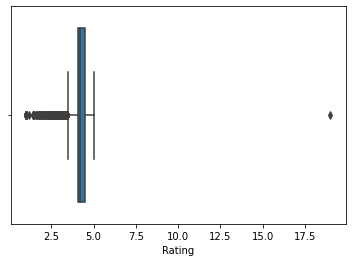

In [71]:
sns.boxplot(data=df_new,x='Rating')
plt.show()

In [73]:
from sklearn.preprocessing import StandardScaler
column=df_new.columns
for col in column:
    ss=StandardScaler()
    df_new[col]=ss.fit_transform(df_new[[col]])

In [74]:
df_new.head()

,Rating,Reviews,Size,Installs,Price,App,Category,Type,Content Rating
0,-0.186851,-0.151649,-0.121181,-0.181753,-0.064413,0.741216,-2.002323,-0.282265,-0.462189
1,-0.587224,-0.151373,-0.362183,-0.175989,-0.064413,-0.815746,-2.002323,-0.282265,-0.462189
2,1.014268,-0.121811,-0.617646,-0.123062,-0.064413,1.350196,-2.002323,-0.282265,-0.462189
3,0.613895,-0.078042,0.168022,0.406215,-0.064413,1.052177,-2.002323,-0.282265,2.519716
4,0.213522,-0.151373,-0.902029,-0.180694,-0.064413,0.762786,-2.002323,-0.282265,-0.462189
